In [1]:
## Project Topic - Smile pattern detection from Facial Dataset

In [2]:
## download zip file from external storage, google sharing not works
!wget --no-check-certificate https://github.com/aarakh/r-cheat-shits/raw/master/DeepLearning/smile_detection.zip -O /tmp/smile_detection.zip


--2022-03-30 23:37:54--  https://github.com/aarakh/r-cheat-shits/raw/master/DeepLearning/smile_detection.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aarakh/r-cheat-shits/master/DeepLearning/smile_detection.zip [following]
--2022-03-30 23:37:56--  https://raw.githubusercontent.com/aarakh/r-cheat-shits/master/DeepLearning/smile_detection.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10601319 (10M) [application/zip]
Saving to: ‘/tmp/smile_detection.zip’

/tmp/smile_detectio 100%[===================>]  10.11M  1.52MB/s    in 12s     

2022-03-30 23:38:10 (844 KB/s) - ‘/

In [3]:
## import libraries
import os
import random
import zipfile
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

2022-03-30 23:38:16.834183: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-30 23:38:16.834229: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
## unzip dataset and load it in train/test, 
#hierachy of this zip file is test and validation directory as divided in categorical types images
local_zip = '/tmp/smile_detection.zip'
zip_ref = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall('/tmp/smile_detection')

base_dir = '/tmp/smile_detection'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
train_others_dir = os.path.join(train_dir, 'others')
train_smiling_dir = os.path.join(train_dir, 'smiling')

validation_others_dir = os.path.join(validation_dir, 'others')
validation_smiling_dir = os.path.join(validation_dir, 'smiling')

In [6]:
print('Number of other images for training: ', len(os.listdir(train_others_dir)))
print('Number of smiling images for training: ', len(os.listdir(train_smiling_dir)))

print('Number of other images for validation: ', len(os.listdir(validation_others_dir)))
print('Number of smiling images for validation: ', len(os.listdir(validation_smiling_dir)))

Number of other images for training:  1238
Number of smiling images for training:  1562
Number of other images for validation:  600
Number of smiling images for validation:  600


In [7]:
os.listdir(train_others_dir)[:5]

['file3130.jpg',
 'file3148.jpg',
 'file3149.jpg',
 'file3150.jpg',
 'file3151.jpg']

In [8]:
os.listdir(train_smiling_dir)[:5]

['file0001.jpg',
 'file0002.jpg',
 'file0003.jpg',
 'file0004.jpg',
 'file0005.jpg']

In [9]:
# mpimg imread reads image in any format and convert it in matrix format
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(64, 64, 3)

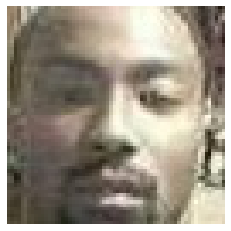

In [10]:
## Non- smiling images
others_image_path = os.path.join(train_others_dir, 'file2778.jpg')
others_image = mpimg.imread(others_image_path)
plt.imshow(others_image)
plt.axis('off')
others_image.shape

(64, 64, 3)

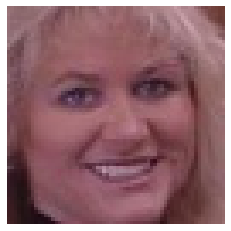

In [11]:
## Smiling images
smiling_image_path = os.path.join(train_smiling_dir, 'file1077.jpg')
smiling_image = mpimg.imread(smiling_image_path)
plt.imshow(smiling_image)
plt.axis('off')
smiling_image.shape

In [12]:
# here only 20 images are taken to just process paths and show images
train_others_images = os.listdir(train_others_dir)[:20]
train_others_images

['file3130.jpg',
 'file3148.jpg',
 'file3149.jpg',
 'file3150.jpg',
 'file3151.jpg',
 'file3152.jpg',
 'file3153.jpg',
 'file3154.jpg',
 'file3155.jpg',
 'file3156.jpg',
 'file3157.jpg',
 'file3158.jpg',
 'file3159.jpg',
 'file3160.jpg',
 'file3161.jpg',
 'file3162.jpg',
 'file3084.jpg',
 'file3085.jpg',
 'file3086.jpg',
 'file3087.jpg']

In [13]:
train_smiling_images = os.listdir(train_smiling_dir)[:20]
train_smiling_images

['file0001.jpg',
 'file0002.jpg',
 'file0003.jpg',
 'file0004.jpg',
 'file0005.jpg',
 'file0006.jpg',
 'file0007.jpg',
 'file0008.jpg',
 'file0009.jpg',
 'file0010.jpg',
 'file0011.jpg',
 'file0012.jpg',
 'file0013.jpg',
 'file0014.jpg',
 'file0015.jpg',
 'file0016.jpg',
 'file0017.jpg',
 'file0018.jpg',
 'file0019.jpg',
 'file0020.jpg']

In [14]:
others_image_paths = [os.path.join(train_others_dir,fname) for fname in train_others_images]
others_image_paths

['/tmp/smile_detection/train/others/file3130.jpg',
 '/tmp/smile_detection/train/others/file3148.jpg',
 '/tmp/smile_detection/train/others/file3149.jpg',
 '/tmp/smile_detection/train/others/file3150.jpg',
 '/tmp/smile_detection/train/others/file3151.jpg',
 '/tmp/smile_detection/train/others/file3152.jpg',
 '/tmp/smile_detection/train/others/file3153.jpg',
 '/tmp/smile_detection/train/others/file3154.jpg',
 '/tmp/smile_detection/train/others/file3155.jpg',
 '/tmp/smile_detection/train/others/file3156.jpg',
 '/tmp/smile_detection/train/others/file3157.jpg',
 '/tmp/smile_detection/train/others/file3158.jpg',
 '/tmp/smile_detection/train/others/file3159.jpg',
 '/tmp/smile_detection/train/others/file3160.jpg',
 '/tmp/smile_detection/train/others/file3161.jpg',
 '/tmp/smile_detection/train/others/file3162.jpg',
 '/tmp/smile_detection/train/others/file3084.jpg',
 '/tmp/smile_detection/train/others/file3085.jpg',
 '/tmp/smile_detection/train/others/file3086.jpg',
 '/tmp/smile_detection/train/ot

In [15]:
smiling_image_paths = [os.path.join(train_smiling_dir,fname) for fname in train_smiling_images]
smiling_image_paths

['/tmp/smile_detection/train/smiling/file0001.jpg',
 '/tmp/smile_detection/train/smiling/file0002.jpg',
 '/tmp/smile_detection/train/smiling/file0003.jpg',
 '/tmp/smile_detection/train/smiling/file0004.jpg',
 '/tmp/smile_detection/train/smiling/file0005.jpg',
 '/tmp/smile_detection/train/smiling/file0006.jpg',
 '/tmp/smile_detection/train/smiling/file0007.jpg',
 '/tmp/smile_detection/train/smiling/file0008.jpg',
 '/tmp/smile_detection/train/smiling/file0009.jpg',
 '/tmp/smile_detection/train/smiling/file0010.jpg',
 '/tmp/smile_detection/train/smiling/file0011.jpg',
 '/tmp/smile_detection/train/smiling/file0012.jpg',
 '/tmp/smile_detection/train/smiling/file0013.jpg',
 '/tmp/smile_detection/train/smiling/file0014.jpg',
 '/tmp/smile_detection/train/smiling/file0015.jpg',
 '/tmp/smile_detection/train/smiling/file0016.jpg',
 '/tmp/smile_detection/train/smiling/file0017.jpg',
 '/tmp/smile_detection/train/smiling/file0018.jpg',
 '/tmp/smile_detection/train/smiling/file0019.jpg',
 '/tmp/smile

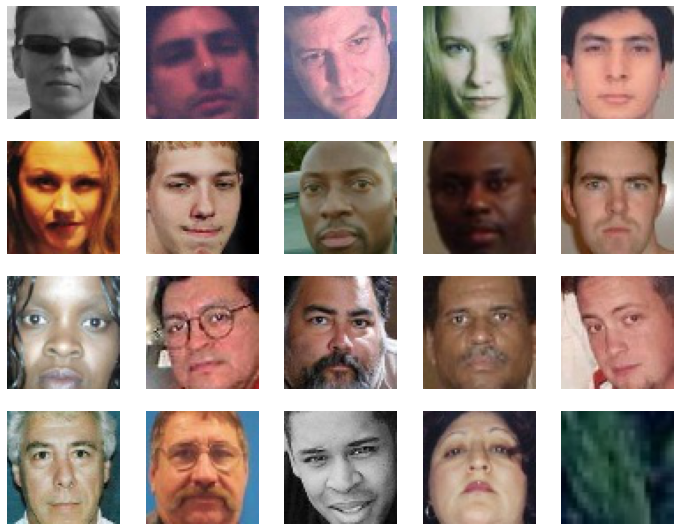

In [16]:
plt.figure(figsize = (12,12))
i = 1 # this is counter for subplot ids
for paths in others_image_paths:
  plt.subplot(5,5,i)
  plt.axis('off')
  others_image = mpimg.imread(paths)
  plt.imshow(others_image)
  i += 1

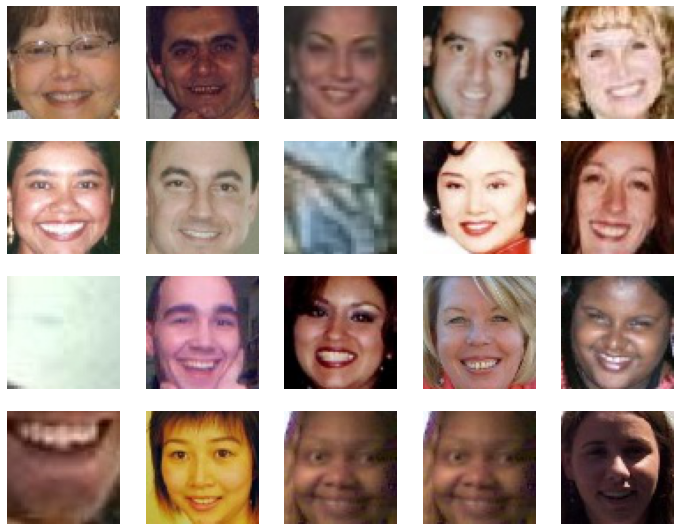

In [17]:
plt.figure(figsize = (12,12))
i = 1 # this is counter for subplot ids
for paths in smiling_image_paths:
  plt.subplot(5,5,i)
  plt.axis('off')
  smiling_image = mpimg.imread(paths)
  plt.imshow(smiling_image)
  i += 1

In [18]:
# Create Training Data Generator, used for Data Augmentation or Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)


In [19]:
# .flow - from dir -  data from DIR
# .flow_from_dataframe - data from DataFrame
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2800 images belonging to 2 classes.


In [20]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1200 images belonging to 2 classes.


In [21]:
# here Shape = 2048,1024 are number of neurons in hidden layer, Dense acts as Hidden Layer
# Flatten acts as input layer
# activation function here is sigmoid

## add lot of hidden layers, gradient back-propogated, as keep on moving backwards, effects becomes negligible
## exploding gradients  --  when gradient passed large, the value becomes large among layers
## diminishing gradients -- when gradient passed are small, the value becomes very small among multiple layers
from tensorflow.keras.layers import Flatten, Dense
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (64,64,3)))  ## input layers with 12288 values
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

2022-03-30 23:39:19.341126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-30 23:39:19.354248: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-30 23:39:19.354308: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PNQ-AARAKH): /proc/driver/nvidia/version does not exist
2022-03-30 23:39:19.433603: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-30 23:39:20.278732: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 50331648 exceeds

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 1024)              12583936  
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 1)                 6

In [23]:
# compiling the model, create a optimizer
## for binary classification loss function - binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = optimizer, 
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [24]:
# fit the model
history = model.fit(
    train_generator,
    validation_data = val_generator,  ## positiion not sure then pass it through key-word argument
    epochs = 50,
    verbose = 1
)

Epoch 1/50


2022-03-30 23:39:23.475771: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 50331648 exceeds 10% of free system memory.


 2/88 [..............................] - ETA: 9s - loss: 0.6906 - accuracy: 0.4844  

2022-03-30 23:39:25.700541: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 50331648 exceeds 10% of free system memory.


88/88 [==============================] - 17s 164ms/step - loss: 0.6710 - accuracy: 0.5882 - val_loss: 0.6659 - val_accuracy: 0.5942
Epoch 2/50
88/88 [==============================] - 11s 130ms/step - loss: 0.6589 - accuracy: 0.6154 - val_loss: 0.6662 - val_accuracy: 0.5900
Epoch 3/50
88/88 [==============================] - 15s 167ms/step - loss: 0.6486 - accuracy: 0.6282 - val_loss: 0.6567 - val_accuracy: 0.6117
Epoch 4/50
88/88 [==============================] - 11s 125ms/step - loss: 0.6339 - accuracy: 0.6432 - val_loss: 0.6559 - val_accuracy: 0.6000
Epoch 5/50
88/88 [==============================] - 11s 126ms/step - loss: 0.6392 - accuracy: 0.6475 - val_loss: 0.6219 - val_accuracy: 0.6733
Epoch 6/50
88/88 [==============================] - 11s 122ms/step - loss: 0.6268 - accuracy: 0.6614 - val_loss: 0.6107 - val_accuracy: 0.6792
Epoch 7/50
88/88 [==============================] - 11s 126ms/step - loss: 0.6268 - accuracy: 0.6554 - val_loss: 0.6535 - val_accuracy: 0.6108
Epoch 8/50

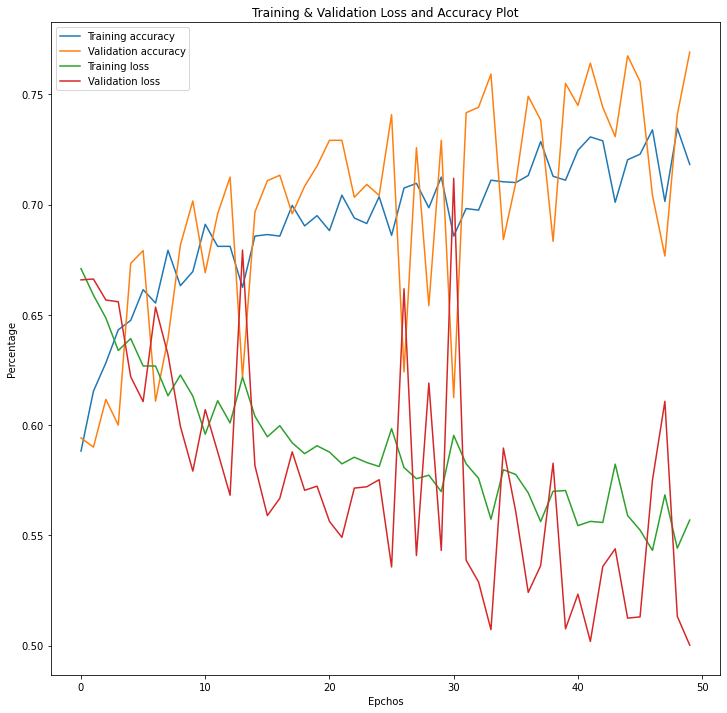

In [25]:
## ploting the accuracy and loss
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(12,12))

plt.plot(np.arange(0,50),acc,label='Training accuracy')
plt.plot(np.arange(0,50),validation_acc,label='Validation accuracy')
plt.plot(np.arange(0,50),loss, label='Training loss')
plt.plot(np.arange(0,50),validation_loss,label='Validation loss')
plt.xlabel('Epchos')
plt.ylabel('Percentage')
plt.title('Training & Validation Loss and Accuracy Plot')
plt.legend()
plt.show()


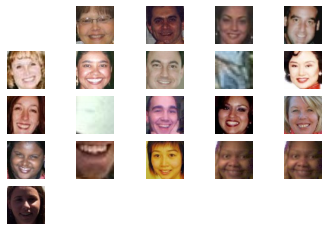

In [26]:
## prediction part
i = 1 # this is counter for subplot ids
for paths in smiling_image_paths:
  plt.subplot(5,5,i+1)
  plt.axis('off')
  smiling_image = mpimg.imread(paths)
  plt.imshow(smiling_image)
  i += 1

In [27]:
# select random others files
random_others_files = []
for i in range(10):
  random_others_files.append(random.choice(os.listdir(train_others_dir)))
#random_others_image_paths = [os.path.join(train_others_dir,fname) for fname in train_others_images]
random_others_files

## select random smiling files
random_smiling_files = []
for i in range(10):
  random_smiling_files.append(random.choice(os.listdir(train_smiling_dir)))
#random_others_image_paths = [os.path.join(train_others_dir,fname) for fname in train_others_images]
random_smiling_files

['file0957.jpg',
 'file0061.jpg',
 'file0043.jpg',
 'file0746.jpg',
 'file1390.jpg',
 'file0068.jpg',
 'file0092.jpg',
 'file1291.jpg',
 'file1399.jpg',
 'file0423.jpg']

In [28]:
random_others_image_paths = [os.path.join(train_others_dir,fname) for fname in random_others_files]
random_others_image_paths

['/tmp/smile_detection/train/others/file3129.jpg',
 '/tmp/smile_detection/train/others/file3274.jpg',
 '/tmp/smile_detection/train/others/file2887.jpg',
 '/tmp/smile_detection/train/others/file2814.jpg',
 '/tmp/smile_detection/train/others/file2261.jpg',
 '/tmp/smile_detection/train/others/file2924.jpg',
 '/tmp/smile_detection/train/others/file2179.jpg',
 '/tmp/smile_detection/train/others/file3218.jpg',
 '/tmp/smile_detection/train/others/file2592.jpg',
 '/tmp/smile_detection/train/others/file2751.jpg']

In [29]:
random_smiling_image_paths = [os.path.join(train_smiling_dir,fname) for fname in random_smiling_files]
random_smiling_image_paths


['/tmp/smile_detection/train/smiling/file0957.jpg',
 '/tmp/smile_detection/train/smiling/file0061.jpg',
 '/tmp/smile_detection/train/smiling/file0043.jpg',
 '/tmp/smile_detection/train/smiling/file0746.jpg',
 '/tmp/smile_detection/train/smiling/file1390.jpg',
 '/tmp/smile_detection/train/smiling/file0068.jpg',
 '/tmp/smile_detection/train/smiling/file0092.jpg',
 '/tmp/smile_detection/train/smiling/file1291.jpg',
 '/tmp/smile_detection/train/smiling/file1399.jpg',
 '/tmp/smile_detection/train/smiling/file0423.jpg']

In [30]:
random.choice(random_smiling_image_paths)

'/tmp/smile_detection/train/smiling/file0092.jpg'

In [66]:
import seaborn as sns
%matplotlib inline
import pandas as pd
smiling = []
## feed above images to neural network using predict function
def make_predictions(images):
    emo_types = ['smiling','others']
    y_axis_value = np.arange(len(emo_types))
    #y_axis_value = 1 - images
    if images > 0.7:
        smiling.append(images)
        smiling.append(1 - images)
    else:
        
    print(smiling,emo_types)
    plt.bar(y_axis_value, smiling, align = 'center',width =0.25, alpha = 0.5)
    plt.xticks([i + 0.25 for i in range(2)],['smiling','others'])
    plt.ylabel('Types')
    plt.xlabel('Emotion Categories')
    plt.title('Smiling or NOT')
    plt.show()


[array([0.7973615], dtype=float32)] ['smiling', 'others']


TypeError: only size-1 arrays can be converted to Python scalars

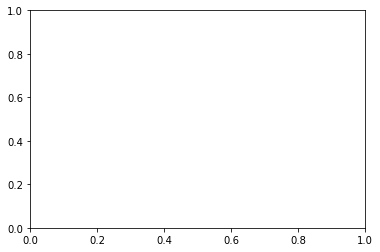

In [67]:
img = image.load_img(random.choice(random_smiling_image_paths), color_mode = "rgb", target_size=(64,64))
x = image.img_to_array(img)
x = x.reshape(64,64,3) 
x = np.expand_dims(x, axis=0)
x /= 255

predictions = model.predict(x)
make_predictions(predictions[0])

x = x.astype('float32')
plt.imshow(x.reshape([64,64,3]))
plt.show()

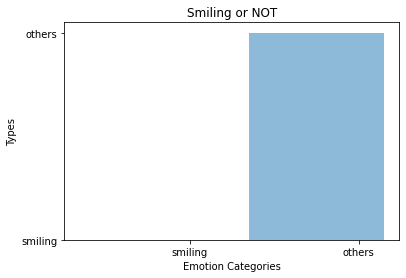

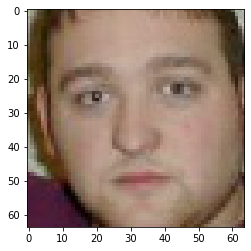

In [43]:
img = image.load_img(random.choice(random_others_image_paths), color_mode = "rgb", target_size=(64,64))
x = image.img_to_array(img)
x = x.reshape(64,64,3) 
x = np.expand_dims(x, axis=0)
x /= 255

predictions = model.predict(x)
make_predictions(predictions[0])

x = x.astype('float32')
plt.imshow(x.reshape([64,64,3]))
plt.show()